This Pixar movie dataset contains the rating scores from Rotten Tomatoes, IMDB, and Metacritic. The opening weekend and worldwide gross revenue amounts, production budget, and number of Oscars are also included in this dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pixar_movies = pd.read_csv("PixarMovies.csv")
print(pixar_movies.shape[0],"rows")
print(pixar_movies.shape[1],"columns")

15 rows
16 columns


Here is the full DataFrame:

In [2]:
pixar_movies.head(15)

,Year Released,Movie,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
0,1995,Toy Story,81,100,8.3,92,29.14,362.0,191.8,356.21,170.2,52.98%,47.02%,30,3.0,0.0
1,1998,A Bug's Life,96,92,7.2,77,33.26,363.4,162.8,277.18,200.6,44.80%,55.20%,45,1.0,0.0
2,1999,Toy Story 2,92,100,7.9,88,57.39,485.0,245.9,388.43,239.2,50.70%,49.32%,90,1.0,0.0
3,2001,"Monsters, Inc.",90,96,8.1,78,62.58,528.8,255.9,366.12,272.9,48.39%,51.61%,115,3.0,1.0
4,2003,Finding Nemo,104,99,8.2,90,70.25,895.6,339.7,457.46,555.9,37.93%,62.07%,94,4.0,1.0
5,2004,The Incredibles,115,97,8.0,90,70.47,631.4,261.4,341.28,370.0,41.40%,58.60%,92,4.0,2.0
6,2006,Cars,116,74,7.2,73,60.12,462.0,244.1,302.59,217.9,52.84%,47.16%,70,2.0,0.0
7,2007,Ratatouille,111,96,8.0,96,47.00,623.7,206.4,243.65,417.3,33.09%,66.91%,150,5.0,1.0
8,2008,WALL-E,97,96,8.4,94,63.10,521.3,223.8,253.11,297.5,42.93%,57.07%,180,6.0,1.0
9,2009,Up,96,98,8.3,88,68.11,731.3,293.0,318.90,438.3,40.07%,59.93%,175,5.0,2.0


Here are the data types for the DataFrame:

In [3]:
pixar_movies.dtypes

Year Released                int64
Movie                       object
Length                       int64
RT Score                     int64
IMDB Score                 float64
Metacritic Score             int64
Opening Weekend            float64
Worldwide Gross            float64
Domestic Gross             float64
Adjusted Domestic Gross    float64
International Gross        float64
Domestic %                  object
International %             object
Production Budget            int64
Oscars Nominated           float64
Oscars Won                 float64
dtype: object

To prepare the DataFrame for analysis, the data needed to be cleaned. First, the IMDB score was changed from a 10 point scale to a 100 point scale in order to match the Rotten Tomatoes and Metacritic scores.

In [4]:
pixar_movies["IMDB Score"] = pixar_movies["IMDB Score"] * 10

Next, the "%" signs were stripped out of the values for Domestic % and International %. The values were also converted from the object data type into floats.

In [5]:
pixar_movies["Domestic %"] = pixar_movies["Domestic %"].str.rstrip("%").astype("float")
pixar_movies["International %"] = pixar_movies["International %"].str.rstrip("%").astype("float")

Last, the missing values were filtered out and a new DataFrame called "filtered_pixar" was created. The default index was also changed to the movie names.

In [6]:
filtered_pixar = pixar_movies.dropna()
pixar_movies.set_index("Movie", inplace=True)
filtered_pixar.set_index("Movie", inplace=True)

Here is the filtered_pixar DataFrame with the movie name index:

In [7]:
filtered_pixar

,Year Released,Length,RT Score,IMDB Score,Metacritic Score,Opening Weekend,Worldwide Gross,Domestic Gross,Adjusted Domestic Gross,International Gross,Domestic %,International %,Production Budget,Oscars Nominated,Oscars Won
Movie,,,,,,,,,,,,,,,
Toy Story,1995,81,100,83.0,92,29.14,362.0,191.8,356.21,170.2,52.98,47.02,30,3.0,0.0
A Bug's Life,1998,96,92,72.0,77,33.26,363.4,162.8,277.18,200.6,44.80,55.20,45,1.0,0.0
Toy Story 2,1999,92,100,79.0,88,57.39,485.0,245.9,388.43,239.2,50.70,49.32,90,1.0,0.0
"Monsters, Inc.",2001,90,96,81.0,78,62.58,528.8,255.9,366.12,272.9,48.39,51.61,115,3.0,1.0
Finding Nemo,2003,104,99,82.0,90,70.25,895.6,339.7,457.46,555.9,37.93,62.07,94,4.0,1.0
The Incredibles,2004,115,97,80.0,90,70.47,631.4,261.4,341.28,370.0,41.40,58.60,92,4.0,2.0
Cars,2006,116,74,72.0,73,60.12,462.0,244.1,302.59,217.9,52.84,47.16,70,2.0,0.0
Ratatouille,2007,111,96,80.0,96,47.00,623.7,206.4,243.65,417.3,33.09,66.91,150,5.0,1.0
WALL-E,2008,97,96,84.0,94,63.10,521.3,223.8,253.11,297.5,42.93,57.07,180,6.0,1.0


The line graph below displays the three review scores for each movie.

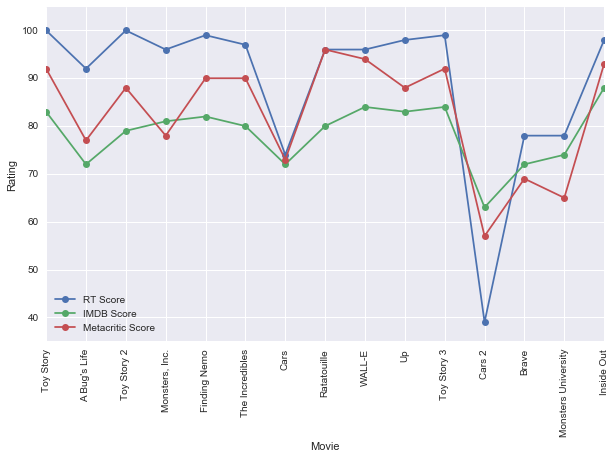

In [8]:
critics_reviews = pixar_movies[["RT Score","IMDB Score","Metacritic Score"]]
critics_reviews.plot(figsize=(10,6), marker="o")
plt.ylabel("Rating")
plt.xticks(range(15),critics_reviews.index, rotation=90)
plt.ylim(35,105)
plt.show()

This box plot shows that Rotten Tomatoes tends to rate Pixar's movies higher than IMDB and Metacritic.

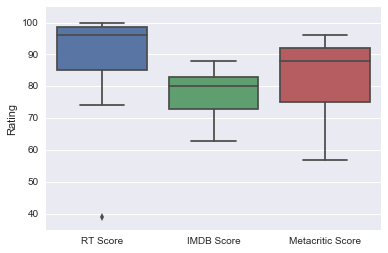

In [9]:
sns.boxplot(data=critics_reviews)
plt.ylabel("Rating")
plt.ylim(35,105)
sns.plt.show()

Here is a stacked bar plot that compares the domestic percentage and international percentage of the total revenue per movie. The graph shows that the international proportion of the revenue has generally increased over time.

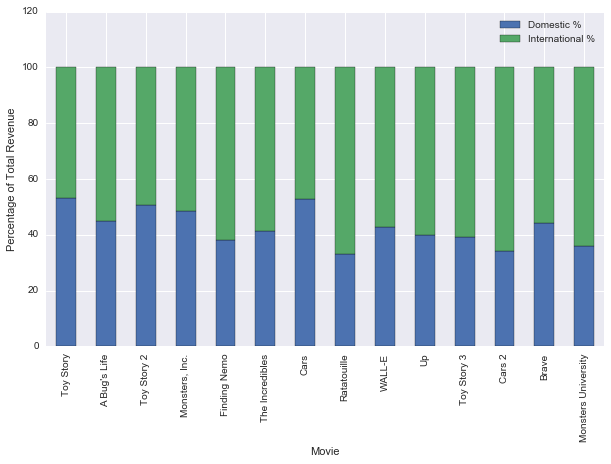

In [10]:
revenue_proportions = filtered_pixar[["Domestic %", "International %"]]
revenue_proportions.plot(kind="bar", stacked=True,figsize=(10,6))
plt.ylabel("Percentage of Total Revenue")
plt.show()

The bar graph below shows the number of Oscars nominated and the number of Oscars won for each Pixar film. There does not seem to be any correlation between the number of Oscar nominations and number of Oscars won for Pixar's movies.

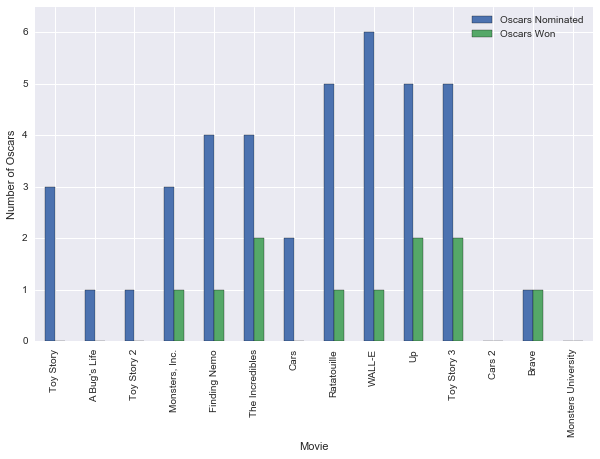

In [11]:
oscars = filtered_pixar[["Oscars Nominated", "Oscars Won"]]
oscars.plot(kind="bar",figsize=(10,6))
plt.ylabel("Number of Oscars")
plt.ylim(0,6.5)
plt.show()

Here is a comparison of the production budgets and opening weekend revenue per movie. The gap between the opening weekend revenue and production budget costs has generally widened over time.

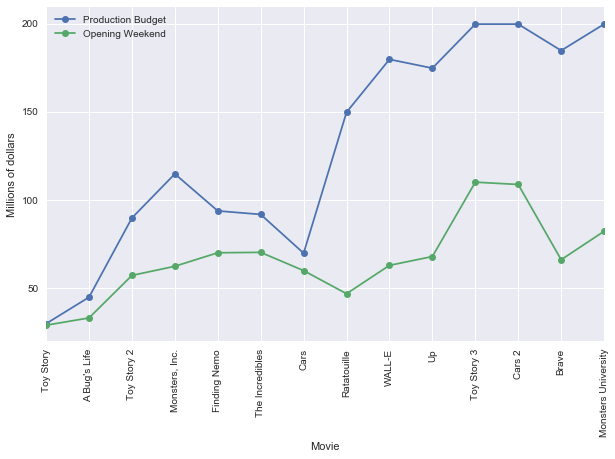

In [12]:
budget_opening = filtered_pixar[["Production Budget","Opening Weekend"]]
budget_opening.plot(x=filtered_pixar.index,marker="o",figsize=(10,6))
plt.ylabel("Millions of dollars")
plt.xticks(range(14),filtered_pixar.index, rotation=90)
plt.ylim(20,210)
plt.show()

Here is a comparison of the production budgets and worldwide gross revenue per movie. While production costs tend to increase steadily, worldwide gross revenue wildly varies by movie.

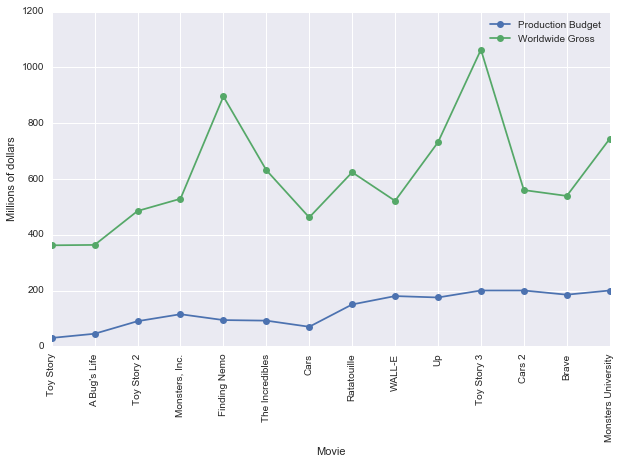

In [13]:
budget_worldwide = filtered_pixar[["Production Budget","Worldwide Gross"]]
budget_worldwide.plot(x=filtered_pixar.index,marker="o",figsize=(10,6))
plt.ylabel("Millions of dollars")
plt.xticks(range(14),filtered_pixar.index, rotation=90)
plt.show()